In [16]:
f3 = r.TFile("./time_lt_0_v9_17_01_full_calo1.root")
f3.ls()

TFile**		./time_lt_0_v9_17_01_full_calo1.root	
 TFile*		./time_lt_0_v9_17_01_full_calo1.root	
  KEY: TCanvas	c1;1	c1


In [17]:
cf3 = f3.Get("c1")
print([x for x in cf3.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffe2ca6c30>, <ROOT.TH2F object ("htemp") at 0x7fffe2355ad0>, <ROOT.TPaveText object ("title") at 0x7fffe2c97160>, <ROOT.TGraph object ("Graph") at 0x7fffe2ca4a30>]


In [18]:
h3 = cf3.GetPrimitive("htemp").Clone()
gr3 = cf3.GetPrimitive("Graph").Clone()

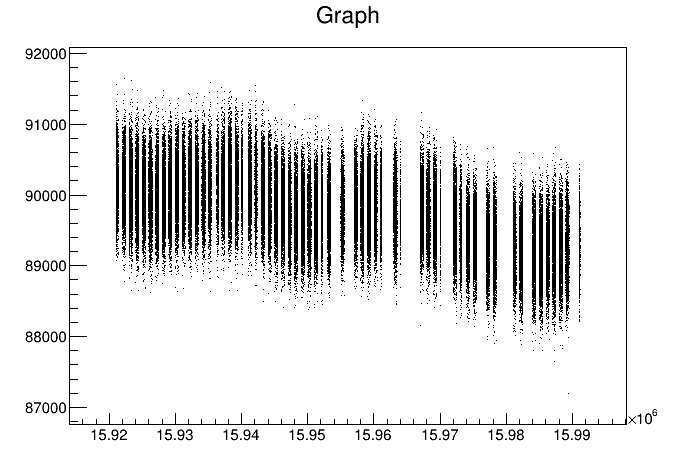

In [19]:
c = r.TCanvas()
#h.Draw()
gr3.Draw("ap")
c.Draw()

In [20]:
h3 = r.TH2D("h3","Energy of Sync Pulses vs. Run/SubRun Number; Run*1000 + SubRun; Energy [MeV]",
           int(72000/1000), 15920000, 15992000,
           14000, 85500, 99500)

In [21]:
for i in range(gr3.GetN()):
    #if(i > 10):
    #    break
    x,y = r.Double(0.),r.Double(0.)
    gr3.GetPoint(i,(x),(y))
    #print(x,y)
    h3.Fill(x,y)

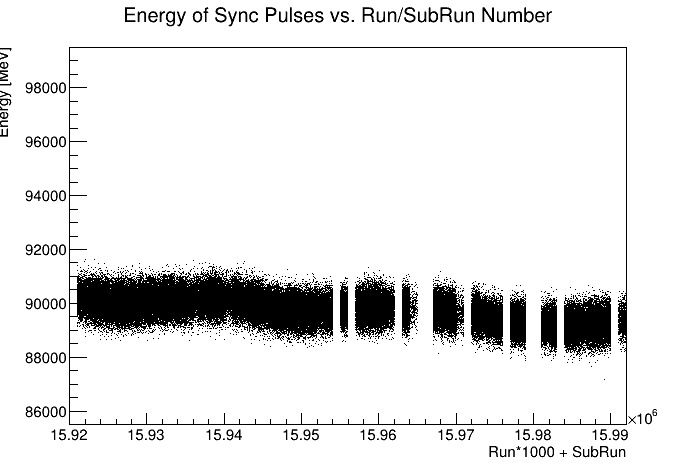

In [22]:
c = r.TCanvas()
h3.Draw()
#gr.Draw("ap")

c.Draw()

In [23]:
h3.SetDirectory(0)

In [24]:
hx3 = h3.ProfileX().Clone()
hx3.SetTitle("Average Energy of Sync Pulses vs. Run/SubRun Number")

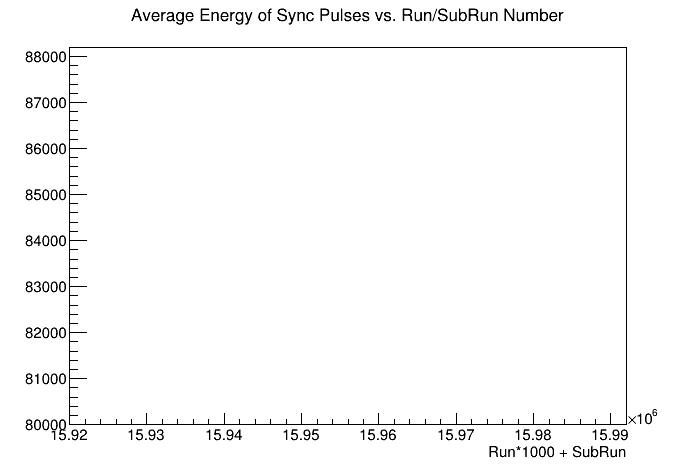

In [25]:
c = r.TCanvas()
#hx3.GetYaxis().SetRangeUser(80000,88200)
hx3.Draw()
c.Draw()

In [26]:
print(hx3.GetMaximumBin())
print(hx3.GetBinContent(hx.GetMaximumBin()))

21
90174.21827706635


In [27]:
hx3_scaled = hx3.Clone()
hx3_scaled.SetLineColor(3)
hx3_scaled.SetMarkerColor(3)
hx3_scaled.Scale(1/hx3_scaled.GetBinContent(hx3_scaled.GetMaximumBin()))

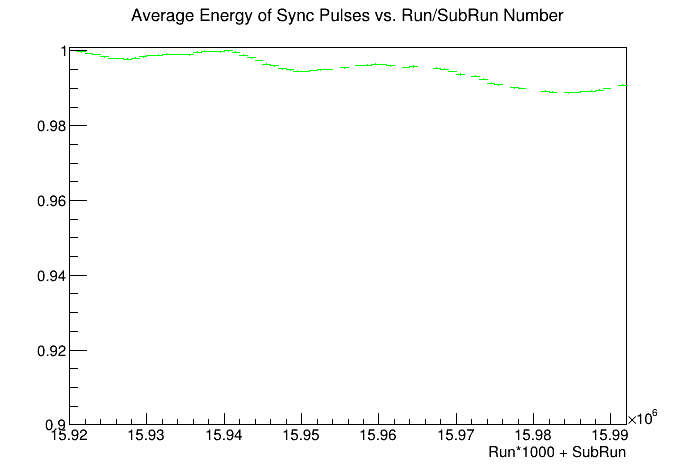

In [28]:
c = r.TCanvas()
hx3_scaled.GetYaxis().SetRangeUser(0.9,1.001)
hx3_scaled.Draw()
c.Draw()